DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

🧠 Why DBSCAN?

- Unlike KMeans, DBSCAN:
- Doesn’t require number of clusters (k) as input
- Detects arbitrary-shaped clusters
- Automatically marks outliers (noise)

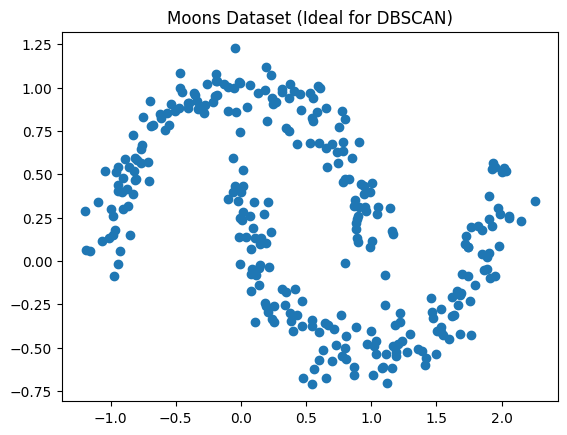

In [4]:
# ✅ Step 1: Load and Visualize Sample Data
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Moons Dataset (Ideal for DBSCAN)")
plt.show()


DBSCAN(eps=0.2)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Noise points: 0


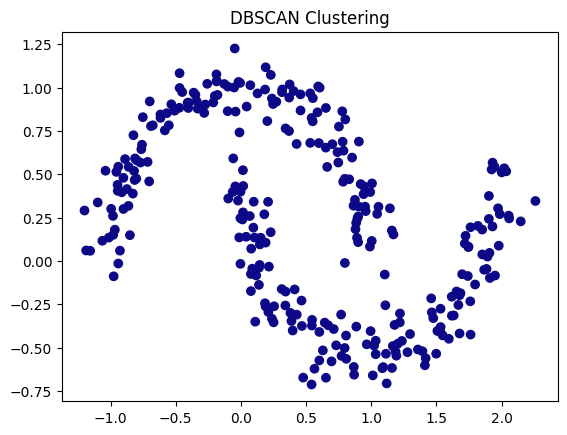

In [ ]:
# ✅ Step 2: Apply DBSCAN
# Let’s run DBSCAN on this moon-shaped dataset and visualize clusters + noise.
from sklearn.cluster import DBSCAN
import numpy as np

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
# print(dbscan)
labels = dbscan.fit_predict(X)
# print(labels)

# Count how many noise points (label = -1)
print("Noise points:", np.sum(labels == -1))

# Visualize result
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()


⚙️ Explanation:
- eps: Max distance to be considered part of the same neighborhood
- min_samples: Minimum neighbors to form a dense region
- label = -1: Noise / outliers

✅ What is eps in DBSCAN?

- eps stands for "epsilon".
- It defines the maximum distance between two points for them to be considered neighbors in a cluster.
- Think of it as the radius of the circle used to group nearby points.

🔍 Smaller eps → tighter clusters, more noise
🔍 Larger eps → loose grouping, fewer clusters

✅ What does dbscan.fit_predict(X) do?
# fit_predict(X):
- Fits the DBSCAN model on your data X.
- Predicts the cluster label for each point.

# Output: An array of labels like [0, 1, -1, 0, ...]
- Each number = a cluster ID
- -1 = noise (doesn’t belong to any cluster)

🧠 Visual analogy:

If each point is a person:
- eps = how close two people must be to form a group.
- min_samples = how many people must be nearby to count as a real group.
- fit_predict = run the logic above and assign people to groups or say they’re outsiders.

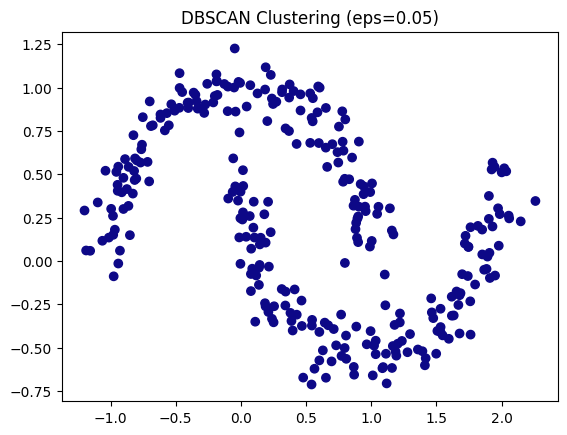

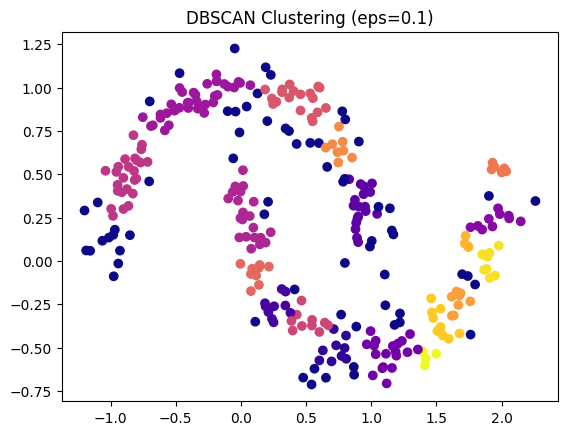

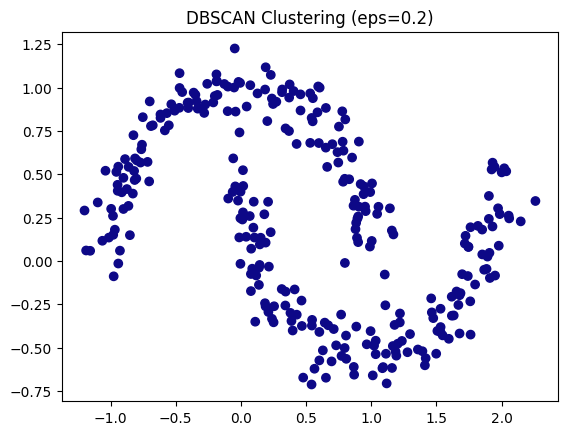

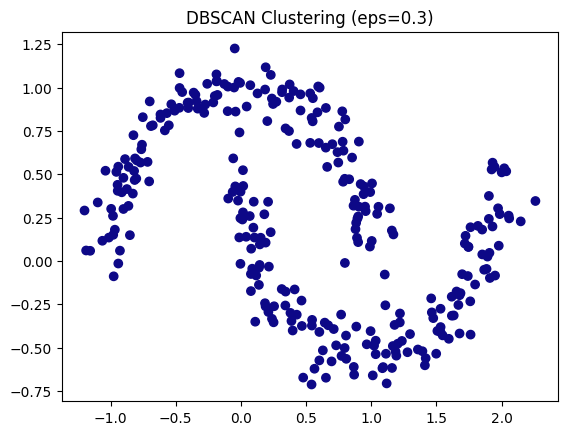

In [8]:
# ✅ Step 3: Tune DBSCAN Parameters for Better Clustering
# The shape of the clusters depends heavily on eps and min_samples. Let’s tune and compare.
# Try different eps values
for eps_val in [0.05, 0.1, 0.2, 0.3]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
    plt.title(f"DBSCAN Clustering (eps={eps_val})")
    plt.show()


🔍 What to observe:

- Too low eps = many points marked as noise
- Too high eps = different clusters merge
- Ideal eps = dense regions grouped, noise excluded

🔍 Mini Project: Mall Visitors Segmentation using DBSCAN

🎯 Goal:
Group mall visitors based on their Spending Score and Annual Income using DBSCAN.

In [10]:
# 🧪 STEP 1: Load and Preview the Data
import pandas as pd

df = pd.read_csv("./Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
# 🧪 STEP 2: Preprocessing
# We'll use only 2 features for DBSCAN clustering:
from sklearn.preprocessing import StandardScaler

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# 🧪 STEP 3: Run DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
df['Cluster'] = labels

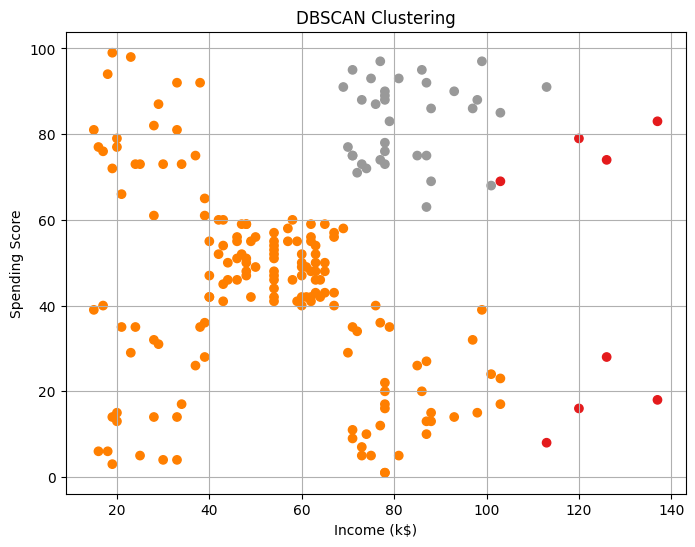

In [13]:
# 🧪 STEP 4: Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Set1')
plt.xlabel('Income (k$)')
plt.ylabel('Spending Score')
plt.title('DBSCAN Clustering')
plt.grid(True)
plt.show()


🧠 Observations to Make:

- How many clusters were formed? (Check: df['Cluster'].unique())
- Any noise? (-1 label)
- Are high spenders separated from low ones?

✅ Bonus:
Try changing eps to 0.3, 0.7, or 1.0 and see how the clusters change.

🧠 Cluster Insights from DBSCAN
Here’s how to interpret your clusters using cluster profiling:

Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


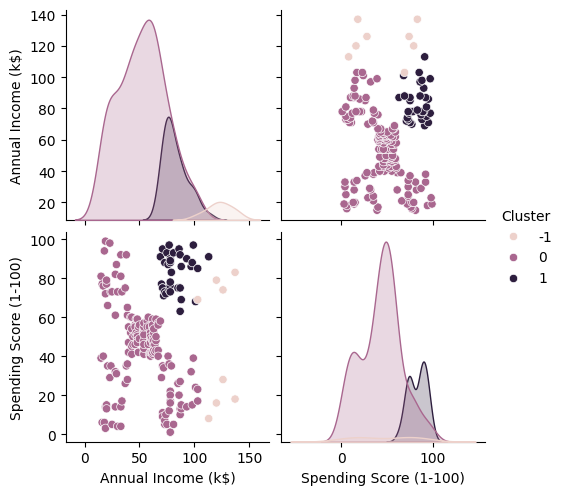

In [14]:
# 🔎 1. How many clusters are there?
print(df['Cluster'].value_counts())
# If you see -1, that’s noise — customers who don’t belong to any group (e.g., outliers).
# Example:
# 0     55
# 1     45
# -1     5

# 📊 2. Average Stats for Each Cluster
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
# You’ll get something like:
# Cluster	Income (k$)	Spending Score
# 0	75	80
# 1	35	30
# -1	90	20

# 🔥 3. Who are your best customers?
# - Look for clusters with:
#   - High income
#   - High spending score
# - These people are likely luxury buyers 💰

# 💸 4. Targeting Strategy
# Cluster	Strategy
# High income + high spenders	Target for luxury products
# Low income + low spenders	Offer budget deals, discounts
# Noise group (-1)	Investigate further – are they extreme outliers?

# 🎯 5. Bonus: Visual Profile
import seaborn as sns
sns.pairplot(df, hue="Cluster", vars=['Annual Income (k$)', 'Spending Score (1-100)'])
# This lets you visually confirm how your clusters differ.


✅ Mini-Recap Before We Move On
You’ve learned and practiced:

Concept	                    Status
KMeans	                    ✅ Done
Elbow + Silhouette	        ✅ Done
PCA + t-SNE Visualization	✅ Done
DBSCAN	                    ✅ Done
Cluster Profiling	        ✅ Done

🔁 Final Real-World Project Options (Optional Before Next Phase)
If you want to cement your clustering skills, pick one:

1. Customer Segmentation for a Shopping Mall
- Columns: Age, Gender, Income, Spending Score
- Use KMeans + DBSCAN + Profiling → Compare

2. Movie Genre Clustering
- Use TMDB data (Genres, Ratings, Vote Count)
- Use PCA or t-SNE → Cluster movies
- Want to do one of these? Or shall we say: